In [1]:
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2025-01-31 10:17:01.423347: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-31 10:17:01.478545: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-31 10:17:01.478629: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-31 10:17:01.479941: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 10:17:01.493236: I tensorflow/core/platform/cpu_feature_guar

Number of batches of 32 images train_ds: 250
Number of batches of 32 images validation_ds: 32
Number of batches of 32 images test_ds: 32


2025-01-31 10:17:04.840679: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


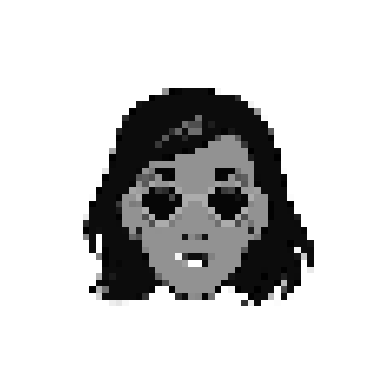

In [2]:
%run "../generacion_cartoon/data/0.1-drac-make_dataset.ipynb"
import generacion_cartoon.utils.paths as path
import notebooks.drac_CNVAE_gradient as CNVAE
import generacion_cartoon.visualization.visualize_CNVAE as visualize 
import tensorflow as tf
import time
import numpy as np

In [26]:
params ={'latent_dim':90,
 'epochs':500,
 'epsilon':0.001,
 'alpha':1.0, #reconstruction_loss
 'beta':0.1,  #grad_decoded_loss
 'gamma':1.0} #center_loss

model = CNVAE.CNVAE(latent_dim=params['latent_dim'], alpha=params['alpha'],beta=params['beta'],gamma=params['gamma'])

CNVAE estandar

In [27]:
name_model = f'model_CNVAE__epochs={params["epochs"]}_epsilon{params["epsilon"]}_alpha={params["alpha"]}_beta{params["beta"]}_gamma{params["gamma"]}.weights.h5'
path_models = path.models_dir(name_model)

Más dimensiones

In [10]:
name_model = f'model_CNVAE__dim{params["latent_dim"]}_epocs={params["epochs"]}_epsilon={params["epsilon"]}_alpha={params["alpha"]}_beta={params["beta"]}_gamma={params["gamma"]}.weights.h5'
path_models = path.models_dir(name_model)

Más dimensiones y fltros

In [28]:
name_model = f'model_FCNVAE__dim{params["latent_dim"]}_epocs={params["epochs"]}_epsilon={params["epsilon"]}_alpha={params["alpha"]}_beta={params["beta"]}_gamma={params["gamma"]}.weights.h5'
path_models = path.models_dir(name_model)

In [29]:
model.load_weights(path_models)

In [30]:
print(name_model)

model_FCNVAE__dim90_epocs=500_epsilon=0.001_alpha=1.0_beta=0.1_gamma=1.0.weights.h5


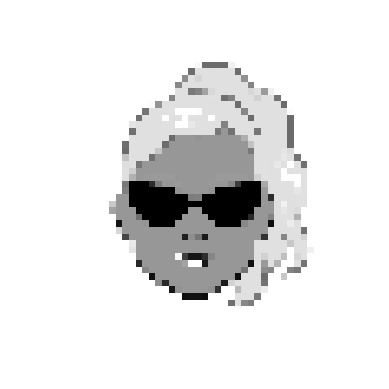

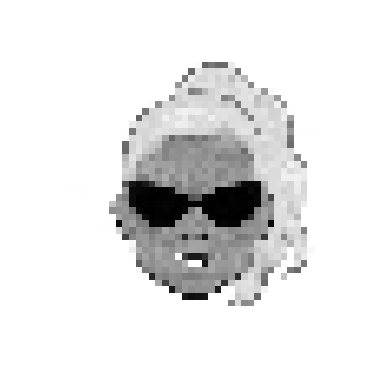

In [34]:
visualize.plot_img_original_generated(model=model,num_img=3,test_ds=test_ds)

In [ ]:
print(name_model)

In [ ]:
visualize.plot_img_original_generated(model=model,num_img=20,test_ds=test_ds)